,string_X_train,Y_label,string_Y_1,string_Y_2
16,SIGNED COMMERCIAL INVOICE IN 3 ORIGINALS INDIC...,CTBC BANK CO LTD,1859,1875
18,SIGNED COMMERCIAL INVOICE IN TRIPLICATE FULL S...,INDUSTRIAL BANK OF KOREA SEOUL,873,903
19,SIGNED COMMERCIAL INVOICE IN TRIPLICATE FULL S...,INDUSTRIAL BANK OF KOREA SEOUL,873,903
22,SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICAT...,CTBC BANK CO LTD,4923,4939
23,SIGNED COMMERCIAL INVOICE IN 2 ORIGINALINDICAT...,CTBC BANK CO LTD,4923,4939


(2993, 4)
(749, 4)


Global seed set to 42
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should pr


epoch:0 train_loss:0.885627579541608 val_loss:0.3734758754951819
save best_model now_val_best_loss is:0.3734758754951819



epoch:1 train_loss:0.37039240024844433 val_loss:0.22138777724717573
save best_model now_val_best_loss is:0.22138777724717573



epoch:2 train_loss:0.23803753649908052 val_loss:0.3015059661921314



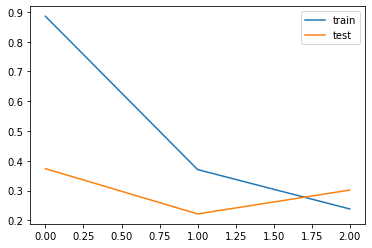

best_model is saved!


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForQuestionAnswering: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this mode

,jaccard,acc(1.0),acc(0.75),acc(0.5),acc(0.25)
0,0.711498,0.495327,0.523364,0.782377,0.915888


,Y_label,predict,是否全對
19801,WOORI BANK,WOORI BANK,Yes
3132,VIETINBANK,VIETINBANK,Yes
1247,INDUSIND BANK LIMITED,INDUSIND BANK LIMITED,Yes
5193,KOOKMIN BANK,KOOKMIN BANKMARKED,No
5923,CATHAY UNITED BANK,CATHAY UNITED BANK,No
...,...,...,...
19522,BANK OF CHINA LTD,BANK OF CHINA LTD,Yes
19114,INDUSTRIAL BANK OF KOREA SEOUL LETTER OF CREDI...,INDUSTRIAL BANK OF KOREA SEOUL,No
2087,CTBC BANK CO LTD,CTBC BANK CO LTD,Yes
4167,TAIPEI FUBON COMMERCIAL BANK,HOURSWETAIPEI FUBON COMMERCIAL BANK,No


In [2]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
df = pd.read_csv('../data/preprocess_for_SQUAD_銀行.csv',index_col=0)
display(df.head())
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
print(train_df.shape)
print(val_df.shape)
url = 'https://gist.githubusercontent.com/skywalker0803r/1e1d0d25999094bf8ec23dc143e02478/raw/2b751c959a1b48a14e627eaf956f9ae3df821f46/bert_train_pipeline.py'
exec(requests.get(url).text)
res,table = bert_train_pipeline(train_df,val_df,
                                qustion='What is the bank name?',
                                model_path='../models/Product_Data_SQuAD_model_銀行.pt')
display(res)
display(table)